# Part 2

In [21]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics
import seaborn as sns
color = sns.color_palette()

In [22]:
data=pd.read_csv('BankNote_Authentication.csv')
data = data.sample(frac=1).reset_index(drop=True)
classes = [0,1]
data.head(5)

,variance,skewness,curtosis,entropy,class
0,1.32640,1.0326,5.6566,-0.41337,0
1,1.29600,4.2855,-4.8457,-2.90130,1
2,-2.79140,1.7734,6.7756,-0.39915,0
3,-0.38388,-1.0471,8.0514,0.49567,0
4,5.72270,5.8312,-2.4097,-0.24527,0


In [23]:
train_df = data[0:1000].reset_index(drop=True)
test_df = data[1000::].reset_index(drop=True)

In [24]:
train_Y =train_df['class'].reset_index(drop=True)
train_X = train_df.loc[:, train_df.columns != 'class']
test_Y =test_df['class'].reset_index(drop=True)
test_X = test_df.loc[:, test_df.columns != 'class']

In [25]:
print(train_X.head())
print(train_Y.head())
print(test_X.head())
print(test_Y.head())

   variance  skewness  curtosis  entropy
0   1.32640    1.0326    5.6566 -0.41337
1   1.29600    4.2855   -4.8457 -2.90130
2  -2.79140    1.7734    6.7756 -0.39915
3  -0.38388   -1.0471    8.0514  0.49567
4   5.72270    5.8312   -2.4097 -0.24527
0    0
1    1
2    0
3    0
4    0
Name: class, dtype: int64
   variance  skewness  curtosis   entropy
0   0.88992   2.26380  -3.10460 -0.118550
1   0.37984   0.70975   0.75716 -0.444410
2  -2.29870  -5.22700   5.63000  0.917220
3   2.56980  -4.40760   5.98560  0.078002
4   5.01850   8.59780  -2.93750 -1.281000
0    1
1    0
2    1
3    0
4    0
Name: class, dtype: int64


# DecisionTree Classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier
classifierDTC = DecisionTreeClassifier()

 # Fit classifier according to X, y(training)
classifierDTC.fit(train_X,train_Y)
y_pred = classifierDTC.predict(test_X)

Model Accuracy for Decision Tree Classifier: 0.9811827956989247


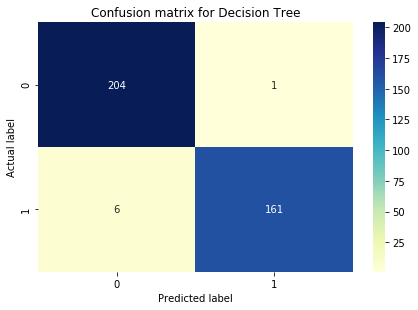

In [27]:
# Making the Confusion Matrix
#print(confusion_matrix(y_test,predictions))
cnf_matrix_dectree = metrics.confusion_matrix(test_Y,y_pred)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_dectree), annot=True, cmap="YlGnBu" ,fmt='g')

plt.tight_layout()
plt.title('Confusion matrix for Decision Tree', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Model Accuracy for Decision Tree Classifier:",metrics.accuracy_score(test_Y,y_pred))

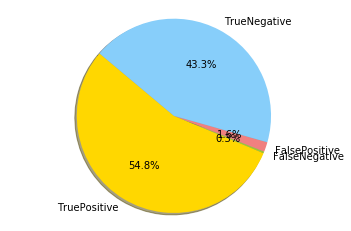

In [28]:
a=confusion_matrix(test_Y,y_pred)
a1=a.flatten()
labels = 'TruePositive', 'FalseNegative', 'FalsePositive', 'TrueNegative'
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

# Plot
plt.pie(a1, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

# Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier
classifierRFC = RandomForestClassifier(n_estimators=1000, random_state=0)

 # Fit classifier according to X, y
classifierRFC.fit(train_X,train_Y) 
y_pred = classifierRFC.predict(test_X)

Model Accuracy for Random Forest Classifier: 0.9865591397849462


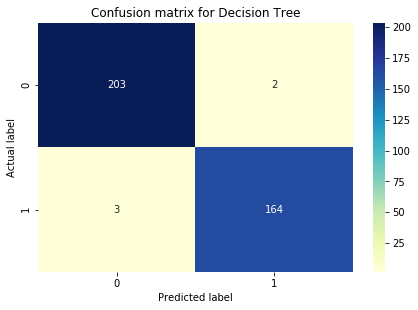

In [30]:
# Making the Confusion Matrix
#print(confusion_matrix(y_test,predictions))
cnf_matrix_dectree = metrics.confusion_matrix(test_Y,y_pred)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_dectree), annot=True, cmap="YlGnBu" ,fmt='g')

plt.tight_layout()
plt.title('Confusion matrix for Decision Tree', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Model Accuracy for Random Forest Classifier:",metrics.accuracy_score(test_Y,y_pred))

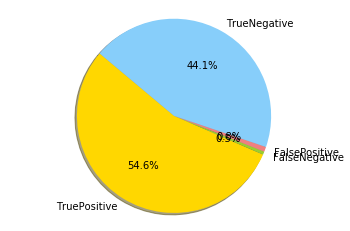

In [31]:
a=confusion_matrix(test_Y,y_pred)
a1=a.flatten()
labels = 'TruePositive', 'FalseNegative', 'FalsePositive', 'TrueNegative'
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

# Plot
plt.pie(a1, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

# AdaBoost Classifier

In [32]:
from sklearn.ensemble import AdaBoostClassifier
classifierAB = AdaBoostClassifier(n_estimators=100, random_state=0)
classifierAB.fit(train_X, train_Y)
AdaBoostClassifier(n_estimators=100, random_state=0)
y_pred = classifierAB.predict(test_X)

Model Accuracy for AdaBoost Classifier: 0.9946236559139785


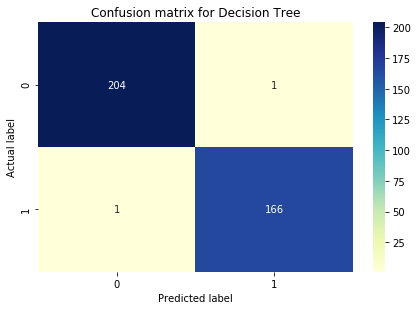

In [33]:

# Making the Confusion Matrix
#print(confusion_matrix(y_test,predictions))
cnf_matrix_dectree = metrics.confusion_matrix(test_Y,y_pred)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_dectree), annot=True, cmap="YlGnBu" ,fmt='g')

plt.tight_layout()
plt.title('Confusion matrix for Decision Tree', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Model Accuracy for AdaBoost Classifier:",metrics.accuracy_score(test_Y,y_pred))

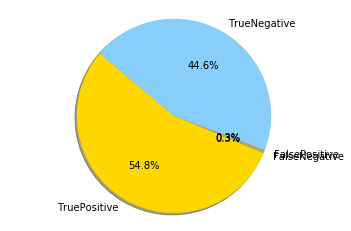

In [34]:
a=confusion_matrix(test_Y,y_pred)
a1=a.flatten()
labels = 'TruePositive', 'FalseNegative', 'FalsePositive', 'TrueNegative'
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

# Plot
plt.pie(a1, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

# Gradient Boosting Classifier

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
classifierGBC = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                           max_depth=1, random_state=0)
classifierGBC.fit(train_X, train_Y)
y_pred = classifierGBC.predict(test_X)

Model Accuracy for Gradient Boosting Classifier: 1.0


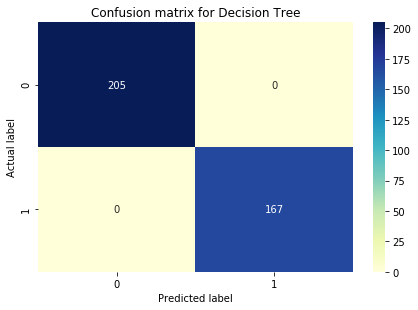

In [36]:
# Making the Confusion Matrix
#print(confusion_matrix(y_test,predictions))
cnf_matrix_dectree = metrics.confusion_matrix(test_Y,y_pred)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_dectree), annot=True, cmap="YlGnBu" ,fmt='g')

plt.tight_layout()
plt.title('Confusion matrix for Decision Tree', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Model Accuracy for Gradient Boosting Classifier:",metrics.accuracy_score(test_Y,y_pred))

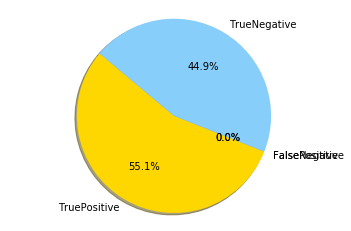

In [37]:
a=confusion_matrix(test_Y,y_pred)
a1=a.flatten()
labels = 'TruePositive', 'FalseNegative', 'FalsePositive', 'TrueNegative'
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

# Plot
plt.pie(a1, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()